In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit,cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB 

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
!pip install xgboost

In [3]:

df = pd.read_csv('data.csv' ,error_bad_lines=False)
df['diagnosis'] = df['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)
df.drop(['Unnamed: 32','id'],axis = 1,inplace = True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


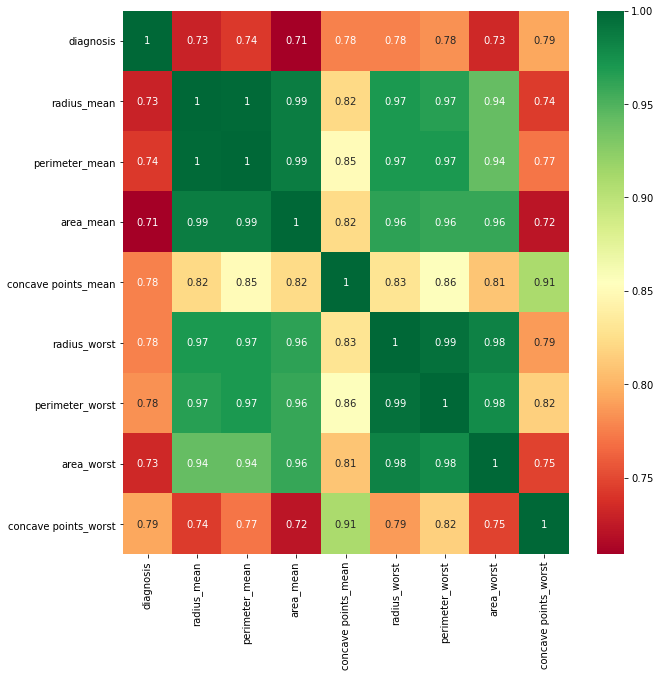

In [7]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["diagnosis"])>0.7]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

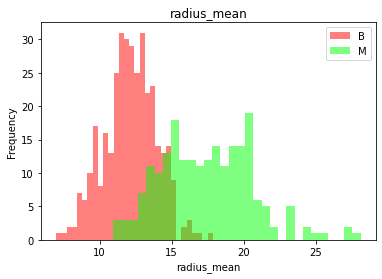

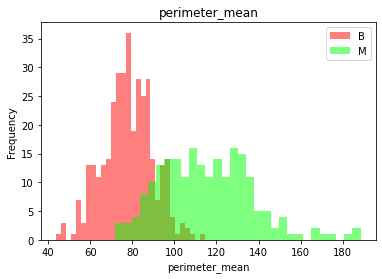

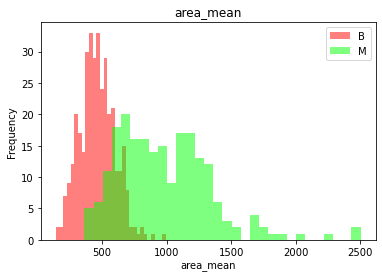

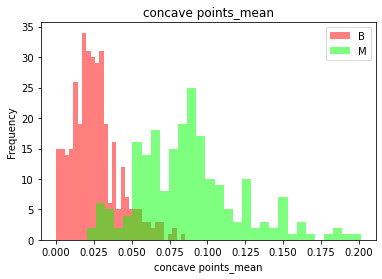

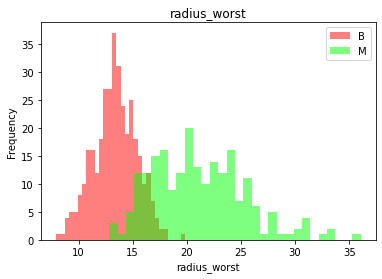

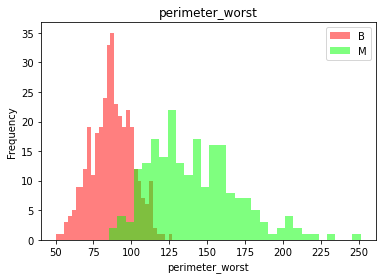

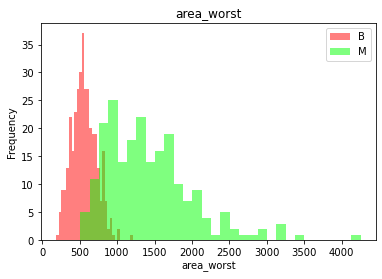

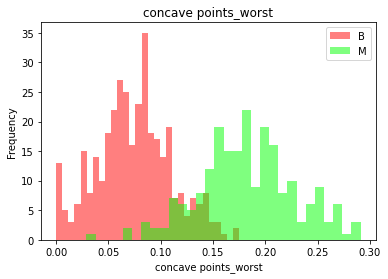

In [8]:
correlated_col_with_dignosis = ['radius_mean','perimeter_mean','area_mean','concave points_mean','radius_worst',
                                'perimeter_worst','area_worst','concave points_worst']

for col in correlated_col_with_dignosis:
    fig = plt.figure()
    plt.hist(df[df['diagnosis'] == 0][col],bins=30,fc = (1,0,0,0.5),label='B')
    plt.hist(df[df['diagnosis'] == 1][col],bins=30,fc = (0,1,0,0.5),label = 'M')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(col)
    plt.show()

In [9]:
del_bin = []
for i in corrmat.columns:
    for j in corrmat.index:
        if i!= 'diagnosis' and j!='diagnosis':
            if corrmat[j][i] >= 0.90 and corrmat[j][i] < 1.0:
                if corrmat['diagnosis'][i] >= corrmat['diagnosis'][j]:
                    del_bin.append(j)
                else:
                    del_bin.append(i)
                    
del_bin = list(set(del_bin))

In [10]:
df.drop(del_bin,axis = 1,inplace = True)

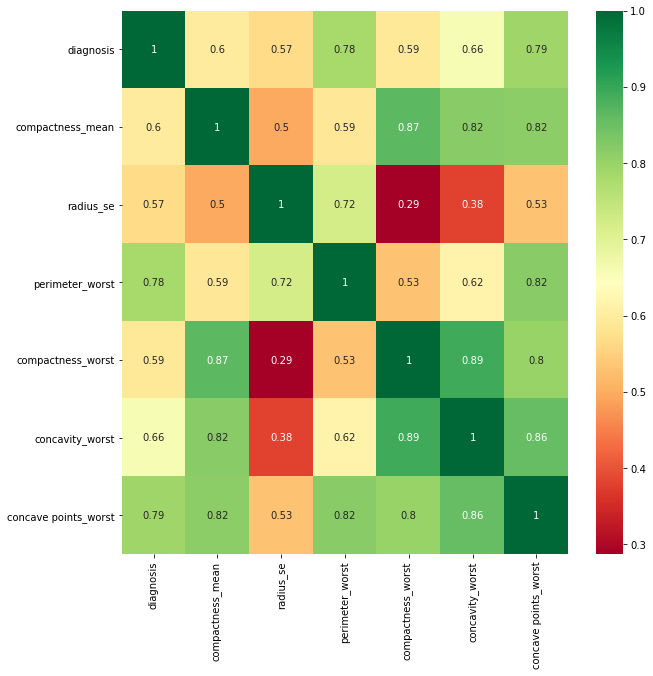

In [11]:
corrmat1 = df.corr()
top_corr_features = corrmat1.index[abs(corrmat1["diagnosis"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

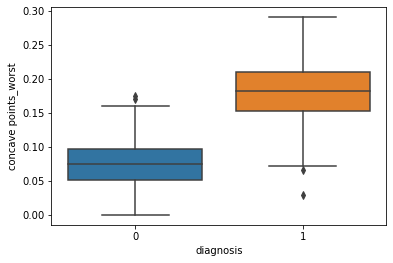

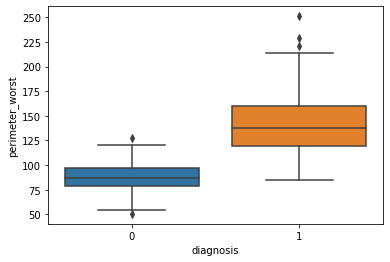

In [12]:
correlated_col_with_dignosis_ = ['concave points_worst','perimeter_worst']
for col in correlated_col_with_dignosis_:
    f1 = plt.figure()
    sns.boxplot(df['diagnosis'],df[col])

In [13]:
df.drop(df[df['diagnosis'] == 0][(df['perimeter_worst']>125) | (df['perimeter_worst']<53)].index,inplace = True)
df.drop(df[df['diagnosis'] == 1][df['perimeter_worst']>215].index,inplace = True)
df.drop(df[df['diagnosis'] == 0][df['concave points_worst']>0.17].index,inplace = True)
df.drop(df[df['diagnosis'] == 1][df['concave points_worst']<0.07].index,inplace = True)

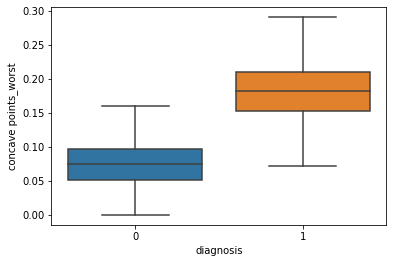

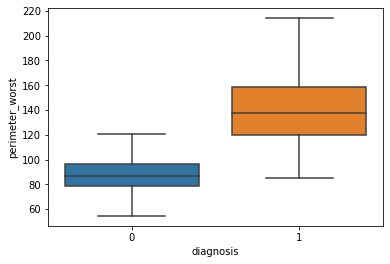

In [14]:
for col in correlated_col_with_dignosis_:
    f1 = plt.figure()
    sns.boxplot(df['diagnosis'],df[col])

In [15]:
x = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns = x.columns)

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [16]:
#Validation
ss = ShuffleSplit(n_splits = 3, test_size = .3, train_size = .7, random_state = 0)

def acc(model):
    cvs = (cross_validate(model,x.values,y.values,cv = ss,return_train_score = True))
    return cvs['train_score'].mean(),cvs['test_score'].mean()

In [17]:
cf1 = XGBClassifier()
cf2 = AdaBoostClassifier()
cf3 = GradientBoostingClassifier()
cf4 = RandomForestClassifier()
cf5 = ExtraTreesClassifier()
cf6 = BaggingClassifier()

clf = [('xgb',cf1),('ada',cf2),('gbm',cf3),('rf',cf4),('et',cf5),('bbc',cf6)]

In [18]:
ens_hard = VotingClassifier(estimators=clf,voting='hard')
ens_soft = VotingClassifier(estimators=clf,voting='soft')
ens = VotingClassifier(estimators = [('ensh',ens_hard),('enss',ens_soft)],voting = 'hard')

In [19]:
ens.fit(x_train.values,y_train.values)

[12:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('ensh',
                              VotingClassifier(estimators=[('xgb',
                                                            XGBClassifier(base_score=None,
                                                                          booster=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          gamma=None,
                                                                          gpu_id=None,
                                                                          importance_type='gain',
                                                                          interaction_constraints=None,
                                                 

In [20]:
confusion_matrix(y_test,ens.predict(x_test.values))

array([[83,  1],
       [ 5, 51]], dtype=int64)

In [21]:
print(classification_report(y_test,ens.predict(x_test.values)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        84
           1       0.98      0.91      0.94        56

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [22]:
acc(ens)

[12:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(1.0, 0.9682539682539683)